In [1]:
# スクレイピング用
from bs4 import BeautifulSoup
from datetime import datetime
import lxml.html
import re
import requests

# wordcloud用
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [2]:
plt.rcParams['font.family'] = 'IPAMincho' #全体のフォントを設定

### AWS SUMMIT TOKYO 2018 のページからセッションの見出しをスクレイピング

In [3]:
session = requests.Session()
url = "https://www.awssummit.tokyo/tokyo_session/session/"
r = session.get(url)

In [4]:
soup = BeautifulSoup(r.content, "html.parser")

In [5]:
titles = []
for s in soup.find_all(id="template"):
    title = s.find("section", class_="block").find("h3").text
    titles.append(title)

### セッションの見出しを形態素解析

In [6]:
#名詞だけ抽出、単語をカウント
def counter(texts):
    t = Tokenizer()
    words_count = defaultdict(int)
    words = []
    for text in texts:
        tokens = t.tokenize(text)
        for token in tokens:
            pos = token.part_of_speech.split(',')
            if "名詞" in pos:
                words_count[token.base_form] += 1
                words.append(token.base_form)
            
    return words_count, words

In [7]:
words_count, words = counter(titles)

### wordcloud で可視化

In [8]:
stop_words = [
    '#',
    '%',
    '(',
    ')',
    '+',
    ',',
    '-',
    '.',
    '/',
    '0',
    '1',
    '10',
    '100',
    '12',
    '2',
    '200',
    '2018',
    '2020',
    '3',
    '4',
    '48',
    '6',
    '90',
    ':',
    '?',
    'AWS',
    '[',
    ']',
    '_',
    '\u3000～',
    'お客様',
    'かた',
    'がん',
    'こと',
    'これ',
    'すべて',
    'それ',
    'ため',
    'の',
    'はたらき',
    'まとめ',
    'まどか',
    'みずほ',
    '！～',
    '？-',
    'ＡＷＳ',
    'ＮＥＣ',
    'ＳＩ',
    '～',
    '～「'
    'Day',
    '基調',
    '講演',
    '同時',
    '通訳',
    'アマゾン',
    'ウェブ',
    'サービス',
    '12',
    '年',
    'まとめ',
    '登壇',
    '事例',
    'Tech',
    'クラウド',
    '再演',
    'クラ',
    'ウド',
    'Amazon',
    'on',
    'EC',
    '入門',
    '活用',
    '実現',
    '利用',
    '最新',
    'データ',
    'デジタル',
    '株式会社',
    'システム',
    '環境',
    '歴史',
    '取り組み',
    '新た',
    'ベストプラクティス',
    '技術',
    '基盤',
    'パネル',
    'ディスカッション',
    'ビジネス',
    '処理',
    'the',
    '設定',
    'Day',
    '方法',
    '構築',
    '組織',
    '進め方',
    'IT',
    '時代',
    '向け',
    'in',
    'Service',
    'ソリューション',
    'フィナンシャルグループ',
    'イノベーション',
    'セッション',
    '作り方',
    '動向',
    '実践',
    '戦略',
    '業界',
    '変革',
    '次世代',
    '開発',
    '対策',
    '勘所',
    '紹介',
    '未来',
    '展開',
    '規模',
    '顧客',
    '挑戦',
    '企業',
    '開発',
    '対応',
    '成功',
    '最適',
    '進化',
    'インフラ',
    '高速',
    '向上',
    'コンサル',
    'Data',
    'NTT',
    'ドコモ',
    '事業',
    'コン',
    'サル',
    '歩み'
]

In [9]:
text = ' '.join(words)

#word cloud
fpath = "C:/Windows/Fonts/ipam.ttf"
wordcloud = WordCloud(
    background_color="white",
    font_path=fpath,
    width=1280, 
    height=1024,
    stopwords=set(stop_words)
).generate(text)

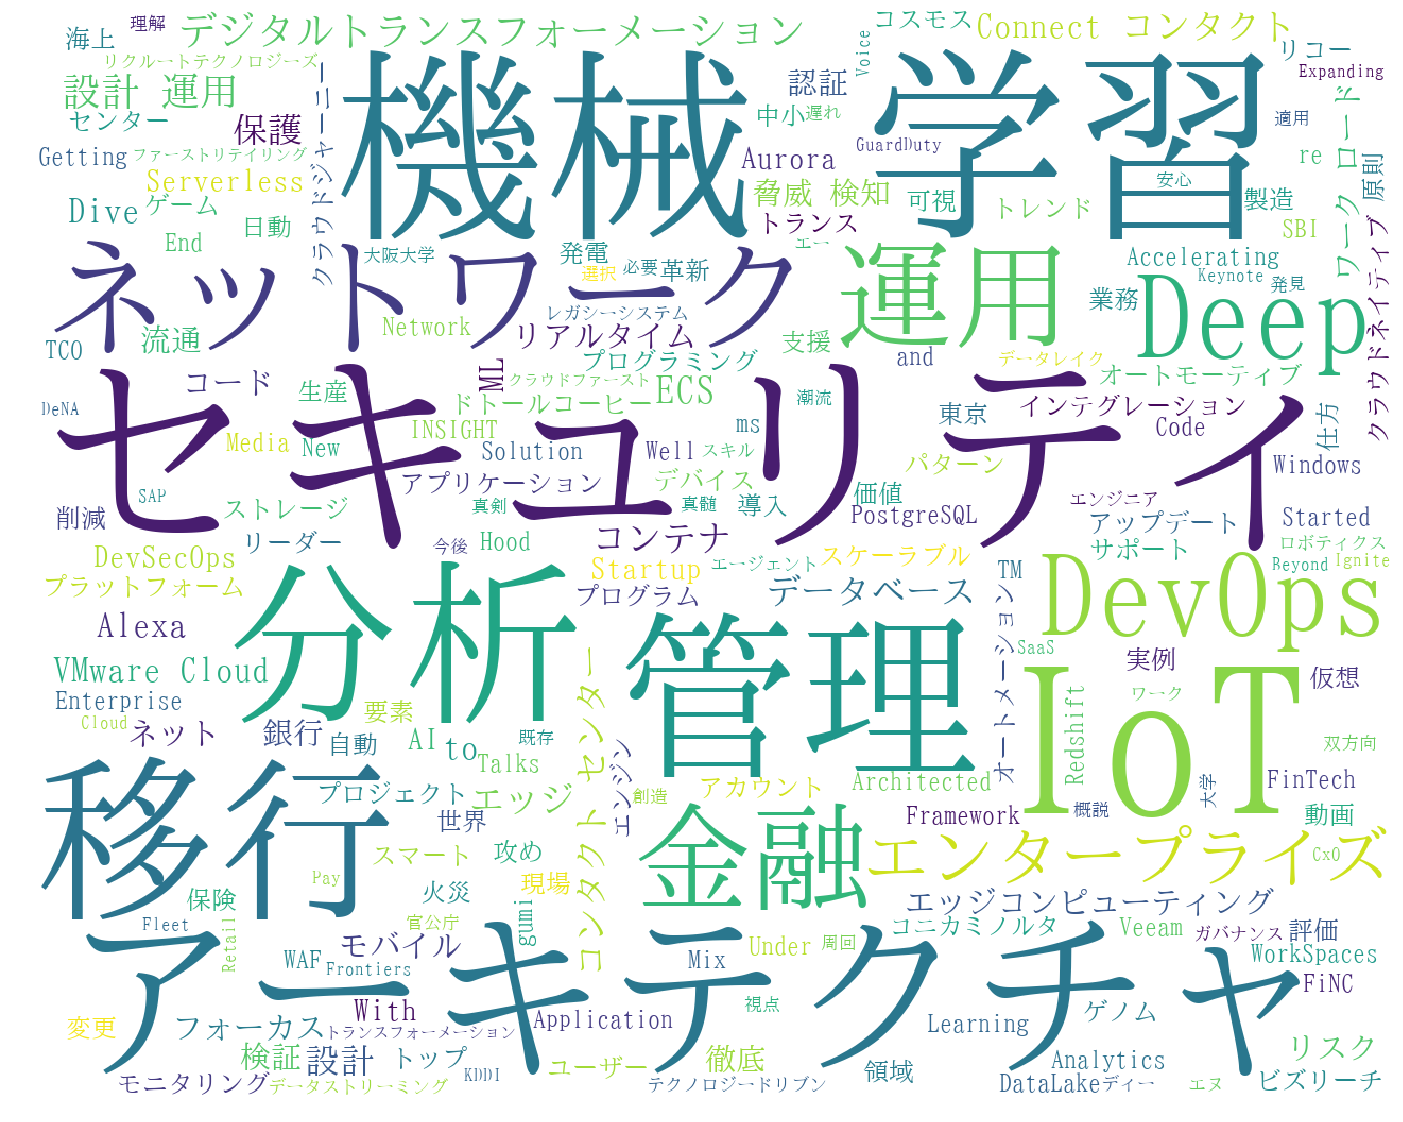

In [10]:
#グラフ表示する処理
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 目立つ言葉を消すとどうなるか？

In [11]:
big_words = [
    "エンタープライズ",
    "アーキテクチャ",
    "セキュリティ",
    "データベース",
    "機械学習",
    "機械",
    "学習",
    "設計",
    "ネットワーク",
    "移行",
    "IoT",
    "分析",
    "管理",
    "金融",
    "運用",
    "Deep",
    "Learning"
]

In [12]:
text = ' '.join(words)

#word cloud
fpath = "C:/Windows/Fonts/ipam.ttf"
wordcloud = WordCloud(
    background_color="white",
    font_path=fpath,
    width=1280, 
    height=1024,
    stopwords=set(stop_words + big_words)
).generate(text)

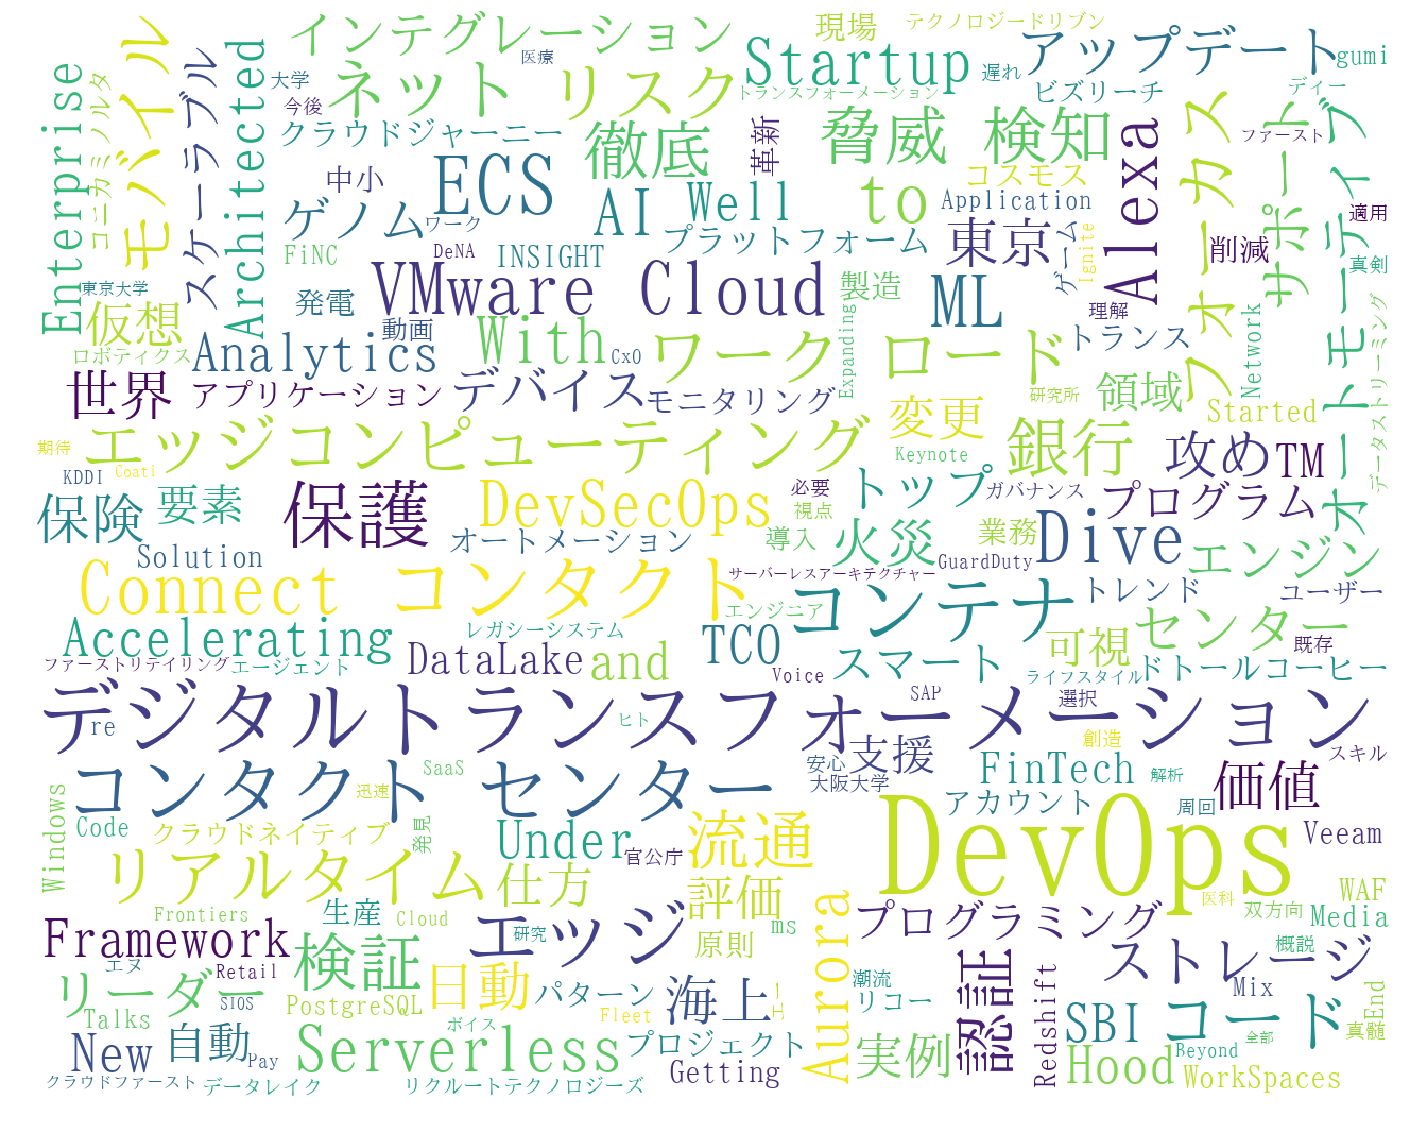

In [13]:
#グラフ表示する処理
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 個人的に気になる単語
- DevOps
- リアルタイム
- ストレージ
- デジタルトランスフォーメーション
- エッジコンピューティング
- コンタクトセンター
- DevSecOps
- ECS